In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
def from_camera():
    cap = cv2.VideoCapture(0)
    ret, frame = cap.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    cap.release()
    plt.imshow(frame)
    plt.show()
    return frame

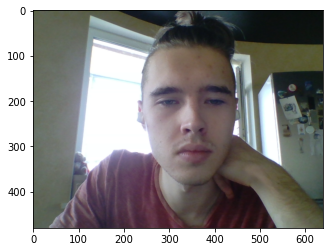

In [18]:
img = from_camera()
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [22]:
def detectAndDisplay(frame):
    frame_gray = cv2.equalizeHist(frame)
    #-- Detect faces
    faces = face_cascade.detectMultiScale(frame)
    for (x,y,w,h) in faces:
        center = (x + w//2, y + h//2)
        frame = cv2.ellipse(frame, center, (w//2, h//2), 0, 0, 360, (255, 0, 255), 4)
        faceROI = frame_gray[y:y+h,x:x+w]
        #-- In each face, detect eyes
        eyes = eyes_cascade.detectMultiScale(faceROI)
        for (x2,y2,w2,h2) in eyes:
            eye_center = (x + x2 + w2//2, y + y2 + h2//2)
            radius = int(round((w2 + h2)*0.25))
            frame = cv2.circle(frame, eye_center, radius, (255, 0, 0 ), 4)
    plt.imshow(frame)
    plt.show()

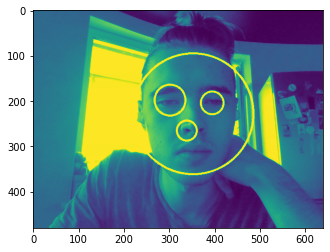

In [24]:
face_cascade = cv2.CascadeClassifier('face.xml')
eyes_cascade = cv2.CascadeClassifier('eyes.xml')
specs_cascade = cv2.CascadeClassifier('datasets/ml/haar/haarcascade_eye_tree_eyeglasses.xml')

detectAndDisplay(gray)